<a href="https://colab.research.google.com/github/ToltyLep/ToltyLep/blob/main/Metodo_de_agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


número de componentes conexas: 2


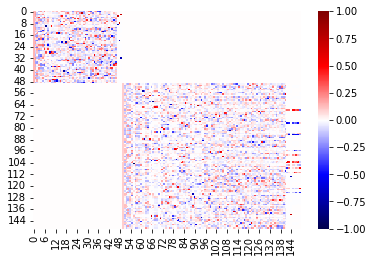

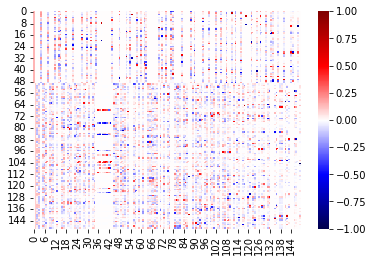

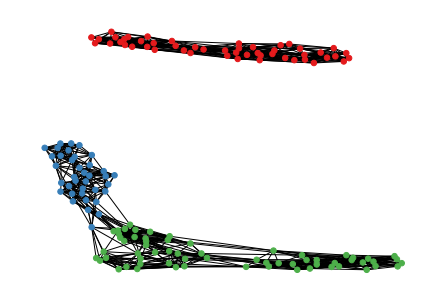

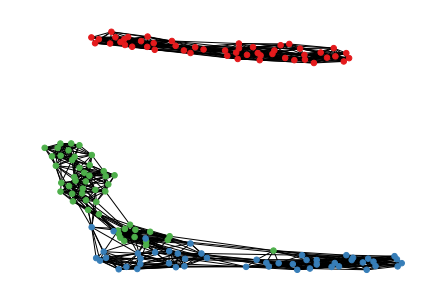

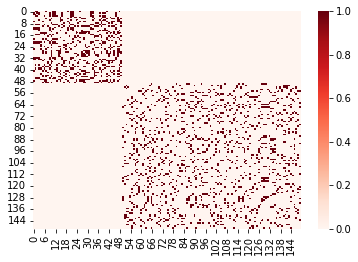

In [ ]:
from networkx.classes.function import degree
#!pip install "networkx<2.7"
#!pip install "scipy<1.8"

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import kneighbors_graph
from sklearn import datasets

import numpy as np

Dados_completo = datasets.load_iris()
dados = Dados_completo.data
labels = Dados_completo.target

np.random.seed(2)
np.random.shuffle(dados)
np.random.seed(2)
np.random.shuffle(labels)

W = kneighbors_graph(dados, n_neighbors = 10)

G = nx.from_numpy_array(W)

N_componentes = nx.number_connected_components(G)

print("número de componentes conexas:", N_componentes)

componentes = list(nx.connected_components(G))

ordem_dados = []
for componente in componentes:
  for i in list(componente):
    ordem_dados.append(i)

dados = dados[ordem_dados,:]
labels = labels[ordem_dados]

W = kneighbors_graph(dados, n_neighbors = 10)

G = nx.from_numpy_array(W)

pos = nx.spring_layout(G, seed = 3)

#plt.figure()
#nx.draw_networkx(G,pos, with_labels = False, node_size = 30)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris50_150.png")
#plt.show()

W = nx.to_numpy_array(G)

D = np.zeros((len(G),len(G)))
for node,degree in G.degree():
  D[node,node] = degree

L = D - W

#L = nx.laplacian_matrix(G)
#L = L.toarray()

Lambda,U = np.linalg.eig(L)

plt.figure()
sns.heatmap(U, cmap = "seismic", vmin = -1 , vmax = 1)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris_U.png")
plt.show()

Ordem = np.argsort(Lambda)
Lambda = Lambda[Ordem]
U = U[:,Ordem]

plt.figure()
sns.heatmap(U, cmap = "seismic", vmin = -1 , vmax = 1)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris_U_ordenada.png")
plt.show()

i = 2

#print("Autovalores da Matriz Laplaciana")
#print(Lambda)

#print("Autovetor %i da Matriz Laplaciana" % i)
#print(U[:,i])

cmap = plt.get_cmap("seismic")
vmin = -1
vmax = 1

#plt.figure()
#nx.draw(G,pos, node_size = 30, node_color = U[:,i], cmap = cmap, vmin = vmin, vmax = vmax)
#sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax = vmax))
#sm.set_array([])
#plt.colorbar(sm,shrink=0.8)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris50_150_autovetor2_sinal.png")
#plt.show()

#print(U.shape)

k = 3
U = U[:,:k]
#print(U.shape)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = k, random_state = 0).fit(U)
kmeans_labels = kmeans.labels_

cmap = plt.get_cmap("Set1")
vmin = 0
vmax = 9

plt.figure()
nx.draw(G,pos,node_size = 30,node_color = kmeans_labels, cmap = cmap, vmax = vmax, vmin = vmin)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris150.png")
plt.show()

plt.figure()
nx.draw(G,pos,node_size = 30,node_color = labels, cmap = cmap, vmax = vmax, vmin = vmin)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris50_2.png")
plt.show()

plt.figure()
sns.heatmap(W, cmap = 'Reds')
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/tabela_iris_3.png")
plt.show()

número de componentes conexas: 1


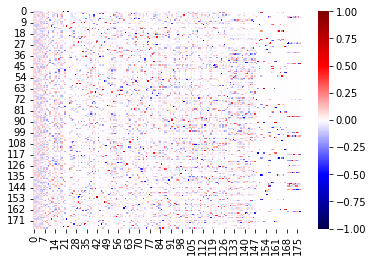

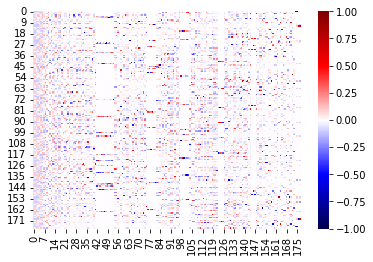

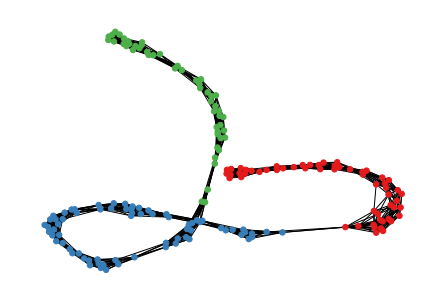

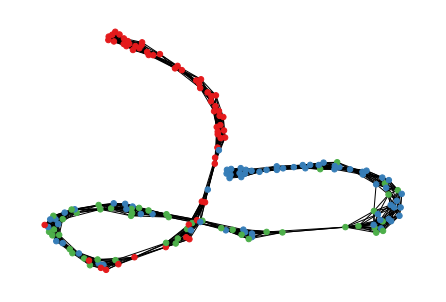

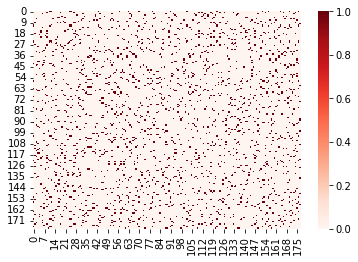

In [ ]:
from networkx.classes.function import degree
#!pip install "networkx<2.7"
#!pip install "scipy<1.8"

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import kneighbors_graph
from sklearn import datasets

import numpy as np

Dados_completo = datasets.load_wine()
dados = Dados_completo.data
labels = Dados_completo.target

np.random.seed(2)
np.random.shuffle(dados)
np.random.seed(2)
np.random.shuffle(labels)

W = kneighbors_graph(dados, n_neighbors = 10)

G = nx.from_numpy_array(W)

N_componentes = nx.number_connected_components(G)

print("número de componentes conexas:", N_componentes)

componentes = list(nx.connected_components(G))

ordem_dados = []
for componente in componentes:
  for i in list(componente):
    ordem_dados.append(i)

dados = dados[ordem_dados,:]
labels = labels[ordem_dados]

W = kneighbors_graph(dados, n_neighbors = 10)

G = nx.from_numpy_array(W)

pos = nx.spring_layout(G, seed = 10000)

#plt.figure()
#nx.draw_networkx(G,pos, with_labels = False, node_size = 30)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris50_150.png")
#plt.show()

W = nx.to_numpy_array(G)

D = np.zeros((len(G),len(G)))
for node,degree in G.degree():
  D[node,node] = degree

L = D - W

#L = nx.laplacian_matrix(G)
#L = L.toarray()

Lambda,U = np.linalg.eig(L)

plt.figure()
sns.heatmap(U, cmap = "seismic", vmin = -1 , vmax = 1)
plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/heatmap_wine_U.png")
plt.show()

Ordem = np.argsort(Lambda)
Lambda = Lambda[Ordem]
U = U[:,Ordem]

plt.figure()
sns.heatmap(U, cmap = "seismic", vmin = -1 , vmax = 1)
plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/heatmap_wine_U_Ordenado.png")
plt.show()

i = 2

#print("Autovalores da Matriz Laplaciana")
#print(Lambda)

#print("Autovetor %i da Matriz Laplaciana" % i)
#print(U[:,i])

cmap = plt.get_cmap("seismic")
vmin = -1
vmax = 1

#plt.figure()
#nx.draw(G,pos, node_size = 30, node_color = U[:,i], cmap = cmap, vmin = vmin, vmax = vmax)
#sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax = vmax))
#sm.set_array([])
#plt.colorbar(sm,shrink=0.8)
#plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/iris50_150_autovetor2_sinal.png")
#plt.show()

#print(U.shape)

k = 3
U = U[:,:k]
#print(U.shape)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = k, random_state = 0).fit(U)
kmeans_labels = kmeans.labels_

cmap = plt.get_cmap("Set1")
vmin = 0
vmax = 9

plt.figure()
nx.draw(G,pos,node_size = 30,node_color = kmeans_labels, cmap = cmap, vmax = vmax, vmin = vmin)
plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/grafo_wine_k-means.png")
plt.show()

plt.figure()
nx.draw(G,pos,node_size = 30,node_color = labels, cmap = cmap, vmax = vmax, vmin = vmin)
plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/grafo_wine_especialistas.png")
plt.show()

plt.figure()
sns.heatmap(W, cmap = 'Reds')
plt.savefig("/content/gdrive/MyDrive/Gabriel/spectral/heatmap_wine_adjacency.png")
plt.show()